In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [541]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [542]:
 
df.shape

(8693, 14)

In [543]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


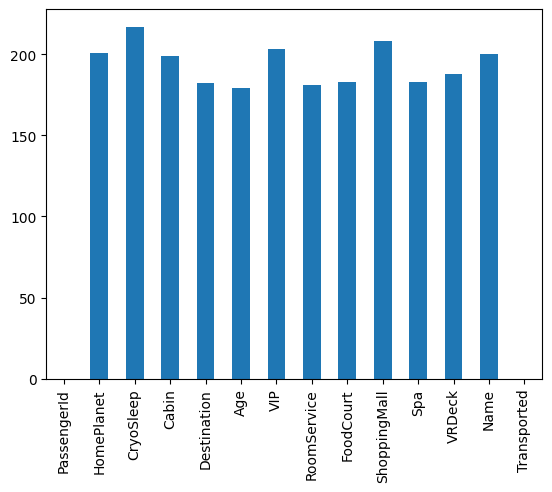

In [544]:
 
df.isnull().sum().plot.bar()
plt.show()

In [545]:
col = df.loc[:,'RoomService':'VRDeck'].columns
df.groupby('VIP')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,217.218527,426.336536,173.876298,301.711045,282.718056
True,473.615385,1811.393782,247.726804,760.710660,1234.856410


In [546]:
df.groupby('CryoSleep')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,350.146772,713.004316,270.586504,486.09294,475.716165
True,0.000000,0.000000,0.000000,0.00000,0.000000


In [547]:
temp = df['CryoSleep'] == True
df.loc[temp, col] = 0.0

temp = test['CryoSleep'] == True
test.loc[temp, col] = 0.0

In [548]:
for c in col:
    for val in [True, False]:
        temp = df['VIP'] == val
        k = df[temp][c].mean()
        df.loc[temp, c] = df.loc[temp, c].fillna(k)
        
for c in col:
    for val in [True, False]:
        temp = test['VIP'] == val
        k = test[temp][c].mean()
        test.loc[temp, c] = test.loc[temp, c].fillna(k)

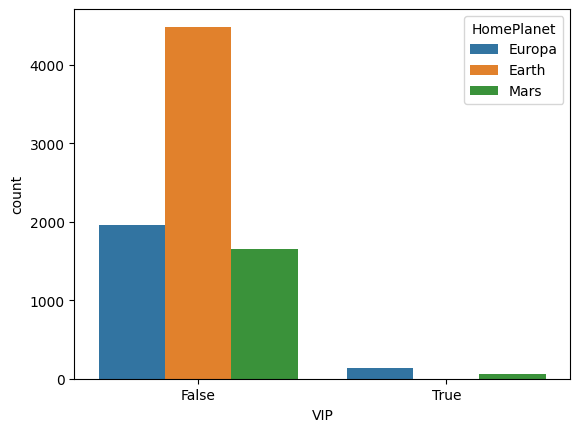

In [549]:
sb.countplot(data=df, x='VIP',
             hue='HomePlanet')
plt.show()

In [550]:
col = 'HomePlanet'
temp = df['VIP'] == False
df.loc[temp, col] = df.loc[temp, col].fillna('Earth')
 
temp = df['VIP'] == True
df.loc[temp, col] = df.loc[temp, col].fillna('Europa')

col = 'HomePlanet'
temp = test['VIP'] == False
test.loc[temp, col] = test.loc[temp, col].fillna('Earth')
 
temp = test['VIP'] == True
test.loc[temp, col] = test.loc[temp, col].fillna('Europa')

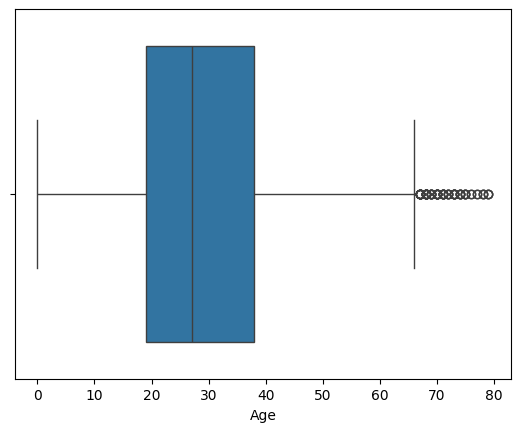

In [551]:
sb.boxplot(df['Age'],orient='h')
plt.show()

In [552]:
temp = df[df['Age'] < 61]['Age'].mean()
df['Age'] = df['Age'].fillna(temp)

temp = test[test['Age'] < 61]['Age'].mean()
test['Age'] = test['Age'].fillna(temp)

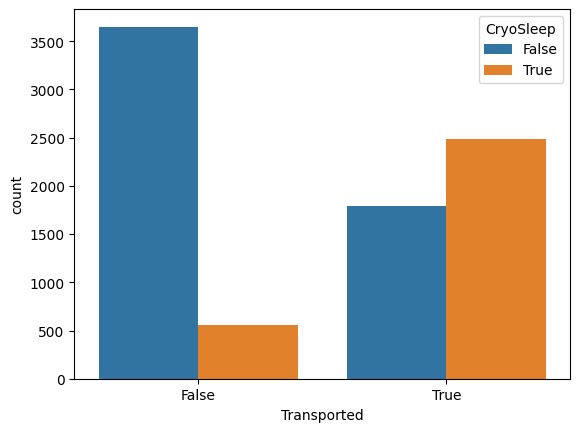

In [553]:
sb.countplot(data=df,
             x='Transported',
             hue='CryoSleep')
plt.show()

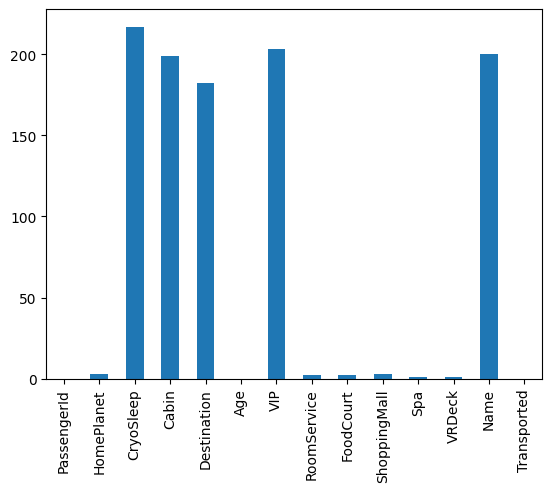

In [554]:
df.isnull().sum().plot.bar()
plt.show()

In [555]:
for col in df.columns:
    # Check for null values presence
    if df[col].isnull().sum() == 0:
        continue
         
    # If the data type is categorical filling by mode.
    if df[col].dtype == object or df[col].dtype == bool:
        df[col] = df[col].fillna(df[col].mode()[0])
         
    # Else by mean
    else:
        df[col] = df[col].fillna(df[col].mean())
        
for col in test.columns:
    # Check for null values presence
    if test[col].isnull().sum() == 0:
        continue
         
    # If the data type is categorical filling by mode.
    if test[col].dtype == object or test[col].dtype == bool:
        test[col] = test[col].fillna(test[col].mode()[0])
         
    # Else by mean
    else:
        test[col] = test[col].fillna(test[col].mean())
df.isnull().sum().sum()


0

In [556]:
test.isnull().sum().sum()

0

In [557]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [558]:
new = df["PassengerId"].str.split("_", n=1, expand=True)
df["RoomNo"] = new[0].astype(int)
df["PassengerNo"] = new[1].astype(int)
 
df.drop(['PassengerId', 'Name'],
        axis=1, inplace=True)
new = test["PassengerId"].str.split("_", n=1, expand=True)
test["RoomNo"] = new[0].astype(int)
test["PassengerNo"] = new[1].astype(int)
 
test.drop(['PassengerId', 'Name'],
        axis=1, inplace=True)

In [559]:
data = df['RoomNo']
for i in range(df.shape[0]):
      temp = data == data[i]
      df['PassengerNo'][i] = (temp).sum() 
      
data = test['RoomNo']
for i in range(test.shape[0]):
      temp = data == data[i]
      test['PassengerNo'][i] = (temp).sum() 

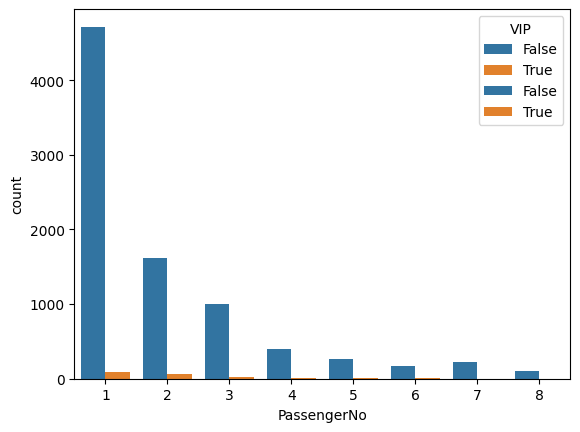

In [560]:
df.drop(['RoomNo'], axis=1,
        inplace=True)
 
sb.countplot(data=df,
             x = 'PassengerNo',
             hue='VIP')

test.drop(['RoomNo'], axis=1,
        inplace=True)
 
sb.countplot(data=test,
             x = 'PassengerNo',
             hue='VIP')

plt.show()

In [561]:
new = df["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
df["F2"] = new[1].astype(int)
df["F3"] = new[2]
 
df.drop(['Cabin'], axis=1,
        inplace=True)

new = test["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
test["F2"] = new[1].astype(int)
test["F3"] = new[2]
 
test.drop(['Cabin'], axis=1,
        inplace=True)

In [562]:
df['Bill'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
test['Bill'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,Bill
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,0,S,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,0,S,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,S,1091.0


In [563]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerNo,F2,F3,Bill
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,1,3,S,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,4,S,2832.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1,0,S,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,1,S,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,5,S,645.0


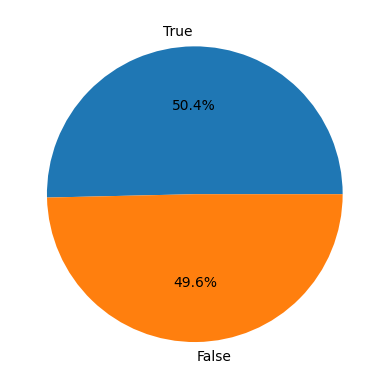

In [564]:
x = df['Transported'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

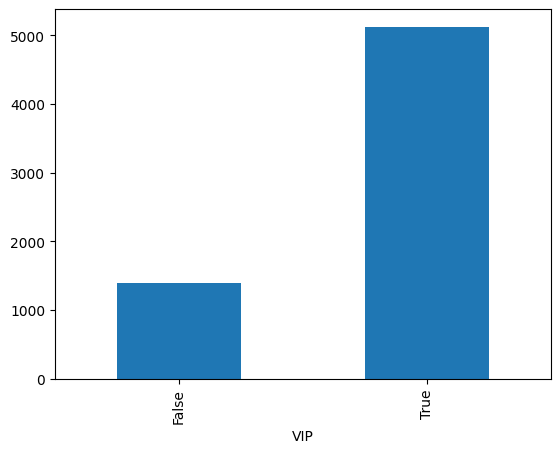

In [565]:
df['Bill'] = pd.to_numeric(df['Bill'], errors='coerce')
df.dropna(subset=['Bill'], inplace=True)
mean_bill_by_vip = df.groupby('VIP')['Bill'].mean()
mean_bill_by_vip.plot(kind='bar')
test['Bill'] = pd.to_numeric(test['Bill'], errors='coerce')
test.dropna(subset=['Bill'], inplace=True)
mean_bill_by_vip = test.groupby('VIP')['Bill'].mean()
mean_bill_by_vip.plot(kind='bar')
plt.show()

In [566]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
 
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
for col in test.columns:
    if test[col].dtype == object:
        le = LabelEncoder()
        test[col] = le.fit_transform(test[col])
 
    if test[col].dtype == 'bool':
        test[col] = test[col].astype(int)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,Bill
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,1,736.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,2,0,1,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,0,1,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,1,1091.0


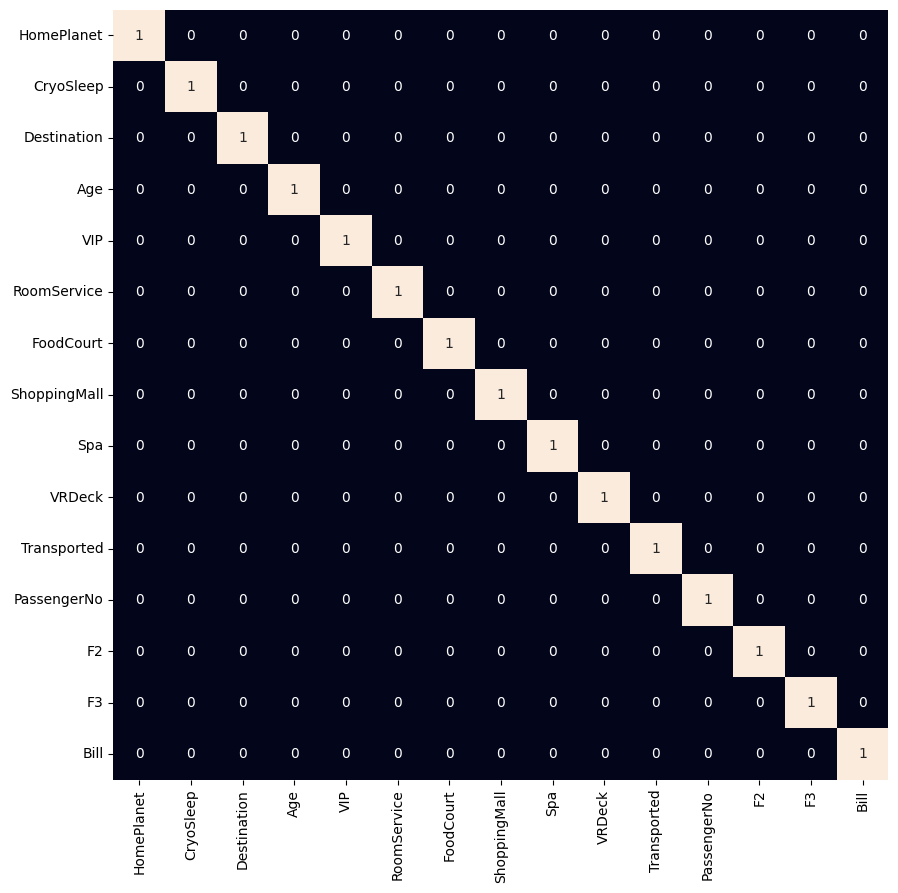

In [567]:
 
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()>0.8,
           annot=True,
           cbar=False)
plt.show()

In [568]:
features = df.drop(['Transported'], axis=1)
target = df.Transported
 
X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
 
X_train.shape, X_val.shape

((7823, 14), (870, 14))

In [569]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [570]:
from sklearn.metrics import roc_auc_score as ras
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True)]
 
for i in range(len(models)):
    models[i].fit(X_train, Y_train)
 
    print(f'{models[i]} : ')
 
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(Y_train, train_preds))
 
    val_preds = models[i].predict_proba(X_val)[:, 1]
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8690376496826604
Validation Accuracy :  0.8572889727392208

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9834723291613665
Validation Accuracy :  0.8761711959977955
SVC(probability=True) : 
Training Accuracy :  0.88

In [571]:
model = XGBClassifier()

X_test = test.values

model.fit(X_train, Y_train)
pred = model.predict(X_test)
submission = pd.read_csv('./test.csv')[["PassengerId"]]
submission["Transported"] = pred.astype(bool)
submission.to_csv('./submission.csv', index = None)
pd.read_csv("submission.csv")

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [572]:
test.isnull().sum().sum()

0